<a href="https://colab.research.google.com/github/srikresna/kesatriyan-2024/blob/main/satria_data_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Path ke file dataset di Google Drive
labeled_dataset_path = '/content/drive/My Drive/BDC_SatriaData_2024/dataset/dataset_penyisihan_bdc_2024.xlsx'
unlabeled_dataset_path = '/content/drive/My Drive/BDC_SatriaData_2024/dataset/dataset_unlabeled_penyisihan_bdc_2024.xlsx'

labeled_df = pd.read_excel(labeled_dataset_path)
unlabeled_df = pd.read_excel(unlabeled_dataset_path)

print(f"Length Labeled Dataset: {len(labeled_df)}")
print(f"Length Unlabeled Dataset: {len(unlabeled_df)}")

Length Labeled Dataset: 5000
Length Unlabeled Dataset: 1000


## Pra-pemrosesan Data

In [6]:
# Module to fix bad unicode string
!pip install ftfy
import ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00


In [7]:
# Fixing bad unicode string
labeled_df['clean_text'] = labeled_df['text'].apply(ftfy.fix_text)
unlabeled_df['clean_text'] = unlabeled_df['Text'].apply(ftfy.fix_text)

In [8]:
unlabeled_df

,IDText,Text,clean_text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,Lu mau org2 pro-demokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,Prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,kiki_daliyo Ganjar Pranowo itulah beliau soso...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,@kumparan Prabowo Gibran yang bisa melakukan i...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...
...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...","Bikin bangga deh, Ganjar-Mahfud mau alokasikan..."
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,Pak Jokowi sebelum pilpres 2024 berbesar hati ...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,@datuakrajoangek Sbaiknya si gemot nga usah ik...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,kebiasaan merembuk atau bermusyawarah jadi gay...


In [9]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [11]:
# Contoh fungsi pembersihan teks
import json
import re

# Load the dictionary from the specified path
with open('/content/drive/My Drive/BDC_SatriaData_2024/data/dictionary.json', 'r') as f:
    dictionary = json.load(f)

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Hilangkan URL
    text = re.sub(r'@\w+', '', text)  # Hilangkan mention
    text = re.sub(r'#\w+', '', text)  # Hilangkan hashtag
    text = re.sub(r'RT\s+', '', text)  # Hilangkan retweet specifier
    text = re.sub(r'\s+', ' ', text)  # Hilangkan spasi berlebih
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Hilangkan karakter khusus
    text = text.lower()  # Ubah ke huruf kecil

    # Ubah singkatan menjadi kata aslinya menggunakan mapping dictionary.json
    for key in dictionary:
        text = re.sub(r'\b' + key + r'\b', dictionary[key], text)

    return text

In [13]:
# Terapkan fungsi pada kolom teks
labeled_df['clean_text'] = labeled_df['clean_text'].apply(clean_text)
unlabeled_df['clean_text'] = unlabeled_df['clean_text'].apply(clean_text)

In [14]:
unlabeled_df

,IDText,Text,clean_text
0,TXT0001,Lu mau org2 pro-demokrasi di negara ini bisa p...,lu mau orang prodemokrasi di negara ini bisa p...
1,TXT0002,Prabowo ditanya soal hutang luar negeri dia me...,prabowo ditanya soal hutang luar negeri dia me...
2,TXT0003,kiki_daliyo Ganjar Pranowo itulah beliau soso...,kikidaliyo ganjar pranowo itulah beliau sosok ...
3,TXT0004,@kumparan Prabowo Gibran yang bisa melakukan i...,prabowo gibran yang bisa melakukan itu semua ...
4,TXT0005,@sniperruben45 @uda_zulhendra @ainunnajib Lah ...,lah justru yang gak nyambung junjungan elu ao...
...,...,...,...
995,TXT0996,"Bikin bangga deh, Ganjar-Mahfud mau alokasikan...",bikin bangga deh ganjarmahfud mau alokasikan s...
996,TXT0997,Pak Jokowi sebelum pilpres 2024 berbesar hati ...,pak jokowi sebelum pilpres berbesar hati meran...
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,sbaiknya si gemot nga usah ikutan debat dehng...
998,TXT0999,kebiasaan merembuk atau bermusyawarah jadi gay...,kebiasaan merembuk atau bermusyawarah jadi gay...


No charts were generated by quickchart


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
!wget https://storage.googleapis.com/babert-pretraining/IndoNLU_finals/dataset/preprocessed/dataset_wot_uncased_blanklines.tar.xz
!tar -xvf dataset_wot_uncased_blanklines.tar.xz

--2024-05-26 06:51:06--  https://storage.googleapis.com/babert-pretraining/IndoNLU_finals/dataset/preprocessed/dataset_wot_uncased_blanklines.tar.xz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.188.207, 64.233.189.207, 108.177.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6017328328 (5.6G) [application/x-tar]
Saving to: ‘dataset_wot_uncased_blanklines.tar.xz’

dataset_wot_uncased 100%[===================>]   5.60G  23.9MB/s    in 4m 16s  

2024-05-26 06:55:23 (22.4 MB/s) - ‘dataset_wot_uncased_blanklines.tar.xz’ saved [6017328328/6017328328]

processed_uncased_blanklines/
processed_uncased_blanklines/talpco_indonesia.txt
processed_uncased_blanklines/wikipedia_conllu.txt
processed_uncased_blanklines/oscar_all_uncased.txt
processed_uncased_blanklines/wiki.txt
processed_uncased_blanklines/opensubtitles.txt
processed_uncased_blanklines/kompas.txt
proce

In [16]:
import re
from collections import Counter

# build language model
def words(text): return re.findall(r'\w+', text.lower())

path_corpus = "/content/processed_uncased_blanklines/wiki.txt"

WORDS = Counter(words(open(path_corpus).read()))

def P(word, N=sum(WORDS.values())):
    "Probability of `word`."
    return WORDS[word] / N

## Tokenisasi dan Stopword Removal

In [18]:
import nltk
nltk.download('stopwords')

# Gunakan stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Fungsi tokenisasi dan stopword removal
def preprocess_text(text):
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

labeled_df['processed_text'] = labeled_df['clean_text'].apply(preprocess_text)
unlabeled_df['processed_text'] = unlabeled_df['clean_text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
print(labeled_df['text'][5])
print(labeled_df['clean_text'][5])
print(labeled_df['processed_text'][5])

RT Duh jangan sampai Pak lurah denger nih ÃƒÂ°Ã‚Å¸Ã‚Â¤Ã‚Â­ Di Acara Hajatan Rakyat, Puluhan Ribu Warga di Kendal Serukan ÃƒÂ¢Ã‚â‚¬Ã‚Å“Ganjar PresidenÃƒÂ¢Ã‚â‚¬Ã‚Â Kehadiran @0Zdeh9QcTWu+z+fS3hRaTcFuSLRh56REFyRLq4/Jdlc= menjadi magnet bagi puluhan ribu warga untuk datang menghadiri Hajatan Rakyat Ganjar-Mahfud. Besarnya antusiasme warga menjadi bukti bahwa Jawa Tengah tetap menjadi kandang banteng. #GanjarMahfud2024 #TabrakProfMahfud [RE DS_yantie]
duh jangan sampai pak lurah denger nih di acara hajatan rakyat puluhan ribu warga di kendal serukan ganjar presiden kehadiran zfshratcfuslrhrefyrlqjdlc menjadi magnet bagi puluhan ribu warga untuk datang menghadiri hajatan rakyat ganjarmahfud besarnya antusiasme warga menjadi bukti bahwa jawa tengah tetap menjadi kandang banteng re dsyantie
duh lurah denger nih acara hajatan rakyat puluhan ribu warga kendal serukan ganjar presiden kehadiran zfshratcfuslrhrefyrlqjdlc magnet puluhan ribu warga menghadiri hajatan rakyat ganjarmahfud besarnya ant

## Visualisasi Data

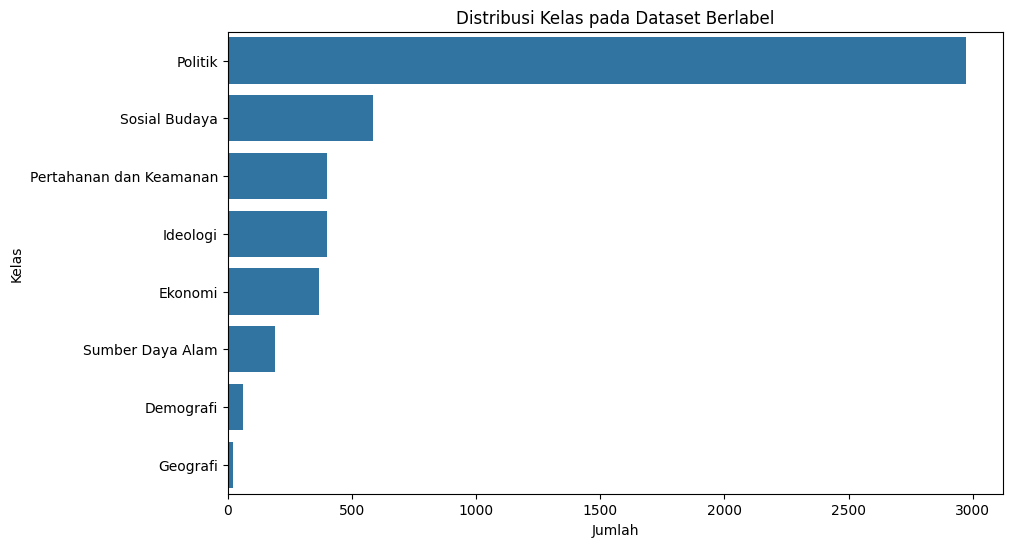

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi kelas pada dataset berlabel
plt.figure(figsize=(10, 6))
sns.countplot(y='label', data=labeled_df, order=labeled_df['label'].value_counts().index)
plt.title('Distribusi Kelas pada Dataset Berlabel')
plt.xlabel('Jumlah')
plt.ylabel('Kelas')
plt.show()

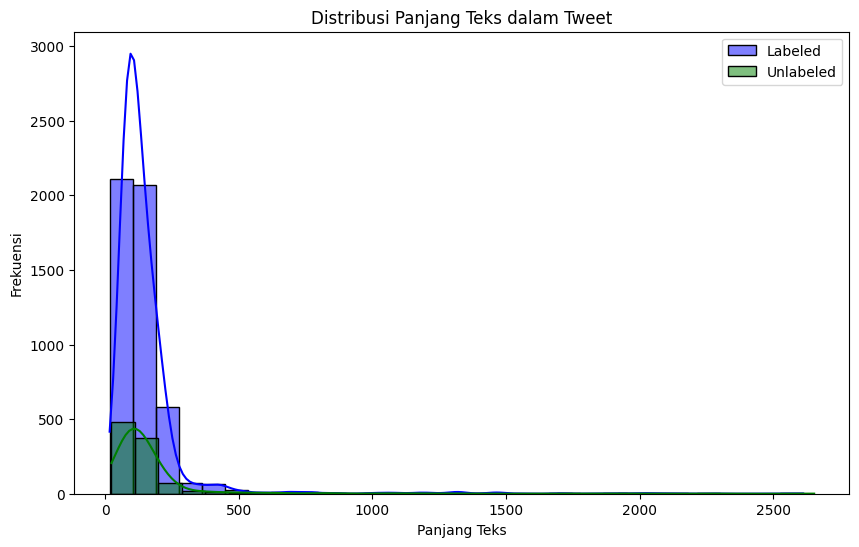

In [21]:

# Visualisasi panjang teks dalam tweet
plt.figure(figsize=(10, 6))
labeled_df['text_length'] = labeled_df['processed_text'].apply(len)
unlabeled_df['text_length'] = unlabeled_df['processed_text'].apply(len)

sns.histplot(labeled_df['text_length'], bins=30, kde=True, color='blue', label='Labeled')
sns.histplot(unlabeled_df['text_length'], bins=30, kde=True, color='green', label='Unlabeled')
plt.title('Distribusi Panjang Teks dalam Tweet')
plt.xlabel('Panjang Teks')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

In [22]:
# Visualisasi word cloud dari dataset berlabel dan tanpa label
from wordcloud import WordCloud

# Gabungkan teks dari semua tweet
all_text_labeled = ' '.join(labeled_df['processed_text'])
all_text_unlabeled = ' '.join(unlabeled_df['processed_text'])

# Buat word cloud
wordcloud_labeled = WordCloud(width=800, height=400, background_color='white').generate(all_text_labeled)
wordcloud_unlabeled = WordCloud(width=800, height=400, background_color='white').generate(all_text_unlabeled)


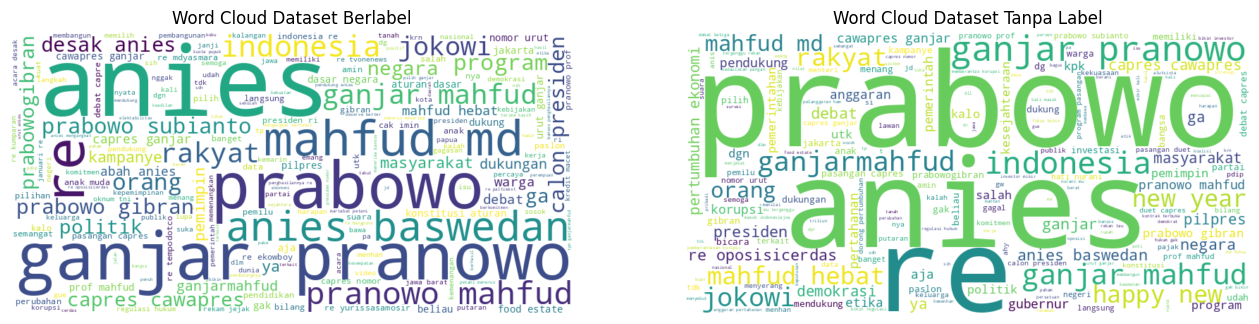

In [23]:
# Plot word cloud
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_labeled, interpolation='bilinear')
plt.title('Word Cloud Dataset Berlabel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_unlabeled, interpolation='bilinear')
plt.title('Word Cloud Dataset Tanpa Label')
plt.axis('off')

plt.show()

## Pembagian Data dan Feature Extraction

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Bagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(labeled_df['processed_text'], labeled_df['label'], test_size=0.3, random_state=42)

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [25]:
print(type(X_train_tfidf))

<class 'scipy.sparse._csr.csr_matrix'>


## Pelatihan dan Evaluasi Model

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score

# Latih model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test_tfidf)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_acc}')


Balanced Accuracy: 0.26280558032871104


## Prediksi pada Dataset Tanpa Label

In [27]:
# Transformasi data tanpa label
unlabeled_tfidf = vectorizer.transform(unlabeled_df['processed_text'])

# Prediksi kategori
unlabeled_df['predicted_label'] = model.predict(unlabeled_tfidf)



# Visualize

<Figure size 1000x800 with 0 Axes>

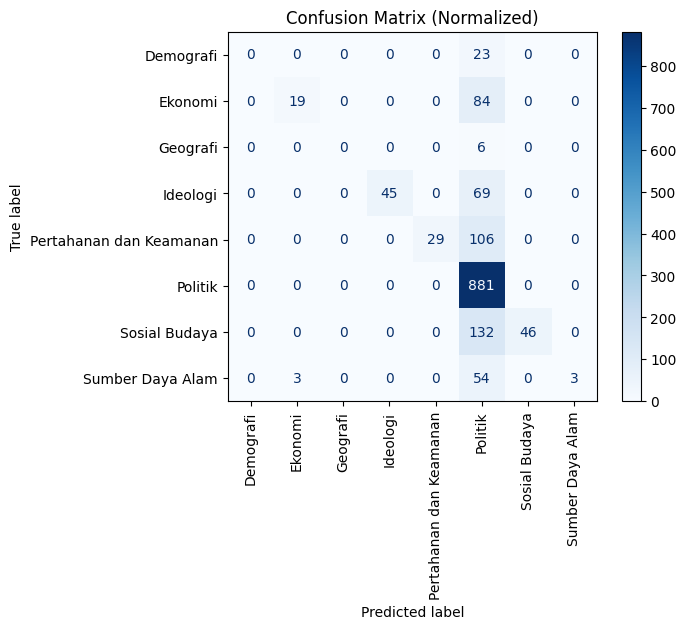

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix (Normalized)')
plt.show()


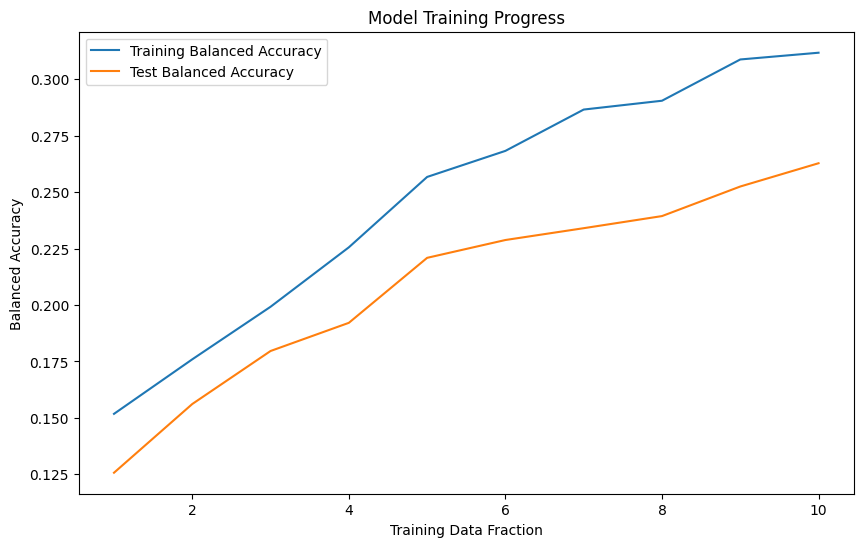

In [29]:
# Visualize Training Progress
training_accuracy = []
test_accuracy = []
num_samples = X_train_tfidf.shape[0]

for i in range(1, 11):
    sample_size = i * num_samples // 10
    model.fit(X_train_tfidf[:sample_size], y_train[:sample_size])
    y_train_pred = model.predict(X_train_tfidf[:sample_size])
    y_test_pred = model.predict(X_test_tfidf)
    training_accuracy.append(balanced_accuracy_score(y_train[:sample_size], y_train_pred))
    test_accuracy.append(balanced_accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), training_accuracy, label='Training Balanced Accuracy')
plt.plot(range(1, 11), test_accuracy, label='Test Balanced Accuracy')
plt.xlabel('Training Data Fraction')
plt.ylabel('Balanced Accuracy')
plt.title('Model Training Progress')
plt.legend()
plt.show()

## Visualize model

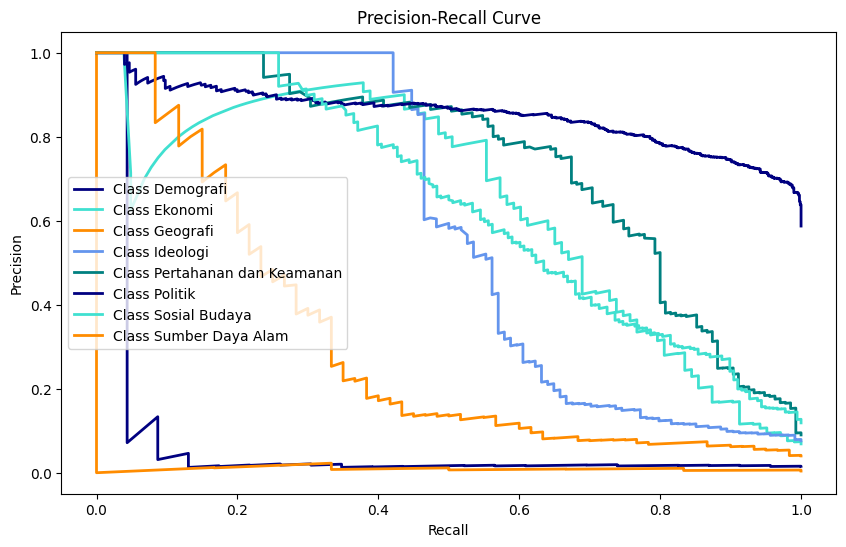

In [30]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from itertools import cycle

# Precision-Recall Curve
plt.figure(figsize=(10, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(len(model.classes_)), colors):
    precision, recall, _ = precision_recall_curve(y_test == model.classes_[i], model.predict_proba(X_test_tfidf)[:, i])
    plt.plot(recall, precision, color=color, lw=2, label=f'Class {model.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

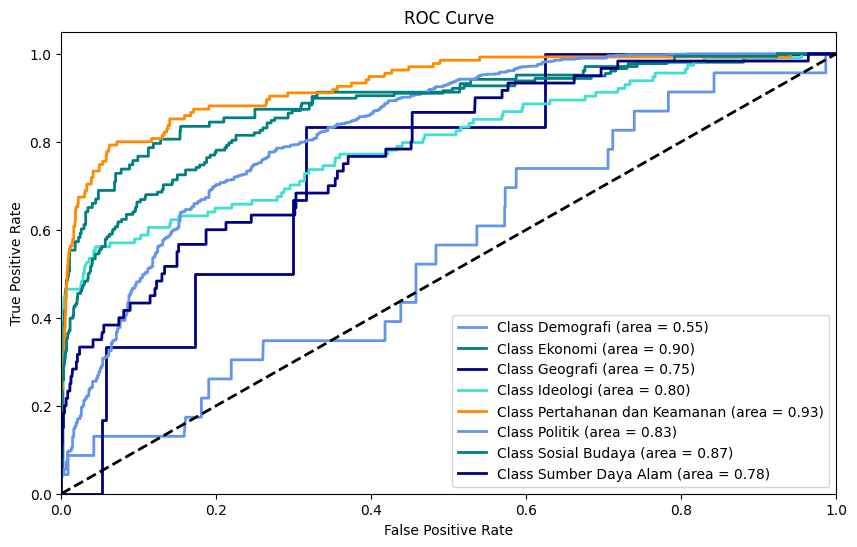

In [31]:
# ROC Curve
plt.figure(figsize=(10, 6))
for i, color in zip(range(len(model.classes_)), colors):
    fpr, tpr, _ = roc_curve(y_test == model.classes_[i], model.predict_proba(X_test_tfidf)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {model.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# 2

In [32]:
!wget https://storage.googleapis.com/babert-pretraining/IndoNLU_finals/dataset/preprocessed/dataset_wot_uncased_blanklines.tar.xz
!tar -xvf dataset_wot_uncased_blanklines.tar.xz

--2024-05-26 07:11:05--  https://storage.googleapis.com/babert-pretraining/IndoNLU_finals/dataset/preprocessed/dataset_wot_uncased_blanklines.tar.xz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.207, 142.250.157.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6017328328 (5.6G) [application/x-tar]
Saving to: ‘dataset_wot_uncased_blanklines.tar.xz.1’

dataset_wot_uncased 100%[===================>]   5.60G  24.5MB/s    in 4m 1s   

2024-05-26 07:15:07 (23.8 MB/s) - ‘dataset_wot_uncased_blanklines.tar.xz.1’ saved [6017328328/6017328328]

processed_uncased_blanklines/
processed_uncased_blanklines/talpco_indonesia.txt
processed_uncased_blanklines/wikipedia_conllu.txt
processed_uncased_blanklines/oscar_all_uncased.txt
processed_uncased_blanklines/wiki.txt
processed_uncased_blanklines/opensubtitles.txt
processed_uncased_blanklines/kompas.txt
p

In [33]:
!pip install transformers

In [34]:
# cek spelling dengan indodb24
from transformers import BertTokenizer, BertForMaskedLM

tokenizer = BertTokenizer.from_pretrained('cahya/bert-base-indonesian-522M')

model = BertForMaskedLM.from_pretrained('cahya/bert-base-indonesian-522M')

from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model=model,
    tokenizer=tokenizer
)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/230k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at cahya/bert-base-indonesian-522M were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [35]:
# Tokenisasi teks
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('cahya/bert-base-indonesian-522M')

labeled_df['tokenized_text'] = labeled_df['clean_text'].apply(lambda x: tokenizer.tokenize(x))
unlabeled_df['tokenized_text'] = unlabeled_df['clean_text'].apply(lambda x: tokenizer.tokenize(x))

In [36]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


In [37]:
# # Stemming teks
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# factory = StemmerFactory()
# stemmer = factory.create_stemmer()

# labeled_df['stemmed_text'] = labeled_df['clean_text'].apply(lambda x: stemmer.stem(x))
# unlabeled_df['stemmed_text'] = unlabeled_df['clean_text'].apply(lambda x: stemmer.stem(x))

In [38]:
# Stopword removal
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()

stopword = factory.create_stop_word_remover()

labeled_df['stopword_removed_text'] = labeled_df['clean_text'].apply(lambda x: stopword.remove(x))
unlabeled_df['stopword_removed_text'] = unlabeled_df['clean_text'].apply(lambda x: stopword.remove(x))

In [39]:
# Ekstraksi fitur
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)

X = vectorizer.fit_transform(labeled_df['stopword_removed_text'])

In [40]:
# Training model dengan AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, labeled_df['label'], test_size=0.2, random_state=42)

clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

              Demografi       0.08      0.31      0.13        13
                Ekonomi       0.58      0.37      0.45        59
               Geografi       0.00      0.00      0.00         4
               Ideologi       0.95      0.26      0.41        81
Pertahanan dan Keamanan       0.73      0.49      0.59        96
                Politik       0.65      0.88      0.75       586
          Sosial Budaya       0.71      0.04      0.08       120
       Sumber Daya Alam       0.50      0.12      0.20        41

               accuracy                           0.62      1000
              macro avg       0.53      0.31      0.33      1000
           weighted avg       0.67      0.62      0.57      1000



In [41]:
# hitung balance accuracy
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.3091975271851612

In [42]:
# Prediksi vs actual lalu simpan xlsx
predictions = clf.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df.to_csv('predictions_vs_actuals_labeled_1.csv', index=False)

## Word2Vec

In [43]:
from gensim.models import Word2Vec

# Tokenisasi teks
labeled_df['tokenized_text'] = labeled_df['clean_text'].apply(lambda x: x.split())
unlabeled_df['tokenized_text'] = unlabeled_df['clean_text'].apply(lambda x: x.split())

# Train Word2Vec model
model = Word2Vec(labeled_df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Ekstraksi fitur
import numpy as np

def calculate_average_word_vector(tokens):
    vector_sum = 0
    count = 0
    for token in tokens:
        if token in model.wv:  # Check if the token is in the vocabulary
            vector_sum += model.wv[token]
            count += 1
    return vector_sum / count if count != 0 else np.zeros(model.vector_size)

X_train = labeled_df['tokenized_text'].apply(calculate_average_word_vector)
X_unlabeled = unlabeled_df['tokenized_text'].apply(calculate_average_word_vector)

In [44]:
# Training model dengan AdaBoost

X = X_train.to_list()
X_unlabeled = X_unlabeled.to_list()

X_train, X_test, y_train, y_test = train_test_split(X, labeled_df['label'], test_size=0.2, random_state=42)

clf = AdaBoostClassifier(n_estimators=100, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

# hitung balance accuracy
balanced_accuracy_score(y_test, y_pred)

                         precision    recall  f1-score   support

              Demografi       0.00      0.00      0.00        13
                Ekonomi       0.17      0.44      0.25        59
               Geografi       0.00      0.00      0.00         4
               Ideologi       0.64      0.28      0.39        81
Pertahanan dan Keamanan       0.62      0.10      0.18        96
                Politik       0.61      0.80      0.69       586
          Sosial Budaya       0.25      0.05      0.08       120
       Sumber Daya Alam       0.25      0.05      0.08        41

               accuracy                           0.54      1000
              macro avg       0.32      0.22      0.21      1000
           weighted avg       0.52      0.54      0.48      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.21598962934818972

Diseimbangkan dulu data nya dulu si. Ini timpang ke politik

## SMOTE Implementation

In [49]:
!pip install imbalanced-learn

In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
# Encode Labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labeled_df['label'])

# Vectorize Text Data
vectorizer = TfidfVectorizer(max_features=5000)
X_vectorized = vectorizer.fit_transform(labeled_df['text'])


In [56]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, encoded_labels)

# split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [57]:
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train, y_train)
y_pred = model_smote.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9308846207766718


<ipython-input-61-65398e7381a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampled_label_counts.index, y=resampled_label_counts.values, palette="viridis")


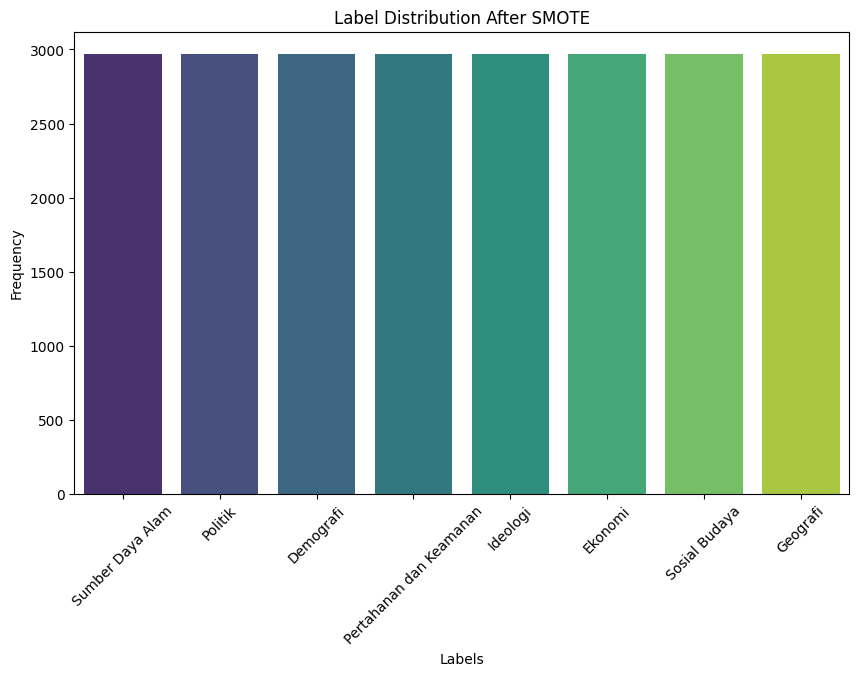

In [61]:
# Visualize label distribution after SMOTE
resampled_labels = label_encoder.inverse_transform(y_resampled)
resampled_label_counts = pd.Series(resampled_labels).value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=resampled_label_counts.index, y=resampled_label_counts.values, palette="viridis")
plt.title('Label Distribution After SMOTE')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


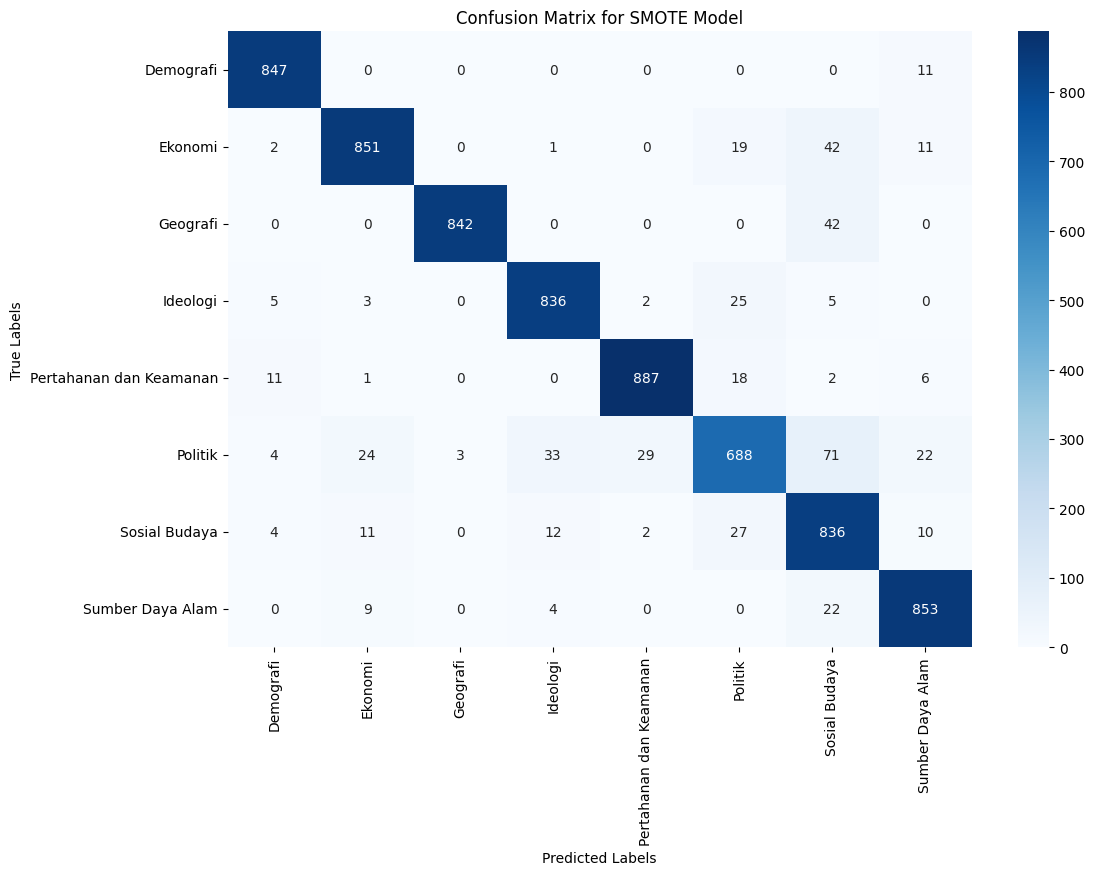

Classification Report for SMOTE Model
                         precision    recall  f1-score   support

              Demografi       0.97      0.99      0.98       858
                Ekonomi       0.95      0.92      0.93       926
               Geografi       1.00      0.95      0.97       884
               Ideologi       0.94      0.95      0.95       876
Pertahanan dan Keamanan       0.96      0.96      0.96       925
                Politik       0.89      0.79      0.83       874
          Sosial Budaya       0.82      0.93      0.87       902
       Sumber Daya Alam       0.93      0.96      0.95       888

               accuracy                           0.93      7133
              macro avg       0.93      0.93      0.93      7133
           weighted avg       0.93      0.93      0.93      7133



In [62]:
# Predict on the test set
y_pred_smote = model_smote.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_smote)
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SMOTE Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print classification report
print('Classification Report for SMOTE Model')
print(classification_report(y_test, y_pred_smote, target_names=label_encoder.classes_))
